 # 🧠 Life Expectancy Analysis & Prediction

### 📌 1. Introduction

Goal: Predict life expectancy using socio-economic and health indicators.

Dataset: WHO data (2000–2015), across ~200 countries.

Output: Insightful visuals + predictive ML model.

### 📁 2. Load Data

In [84]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Life Expectancy Data.csv")
df.head()
df.columns = df.columns.str.strip()


### 🧼 3. Data Preprocessing

In [85]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

# Fill missing values (example: fill BMI with mean)
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())

# Encode categorical variable
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

# Drop rows with remaining nulls
df.dropna(inplace=True)

# Normalize or Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Life expectancy']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Feature Engineering

# Combine infant + under-five deaths into a total early death metric
df['Early_Childhood_Deaths'] = df['infant deaths'] + df['under-five deaths']

# Drop the originals if you like
df.drop(['infant deaths', 'under-five deaths'], axis=1, inplace=True)

# Interaction between GDP and schooling
df['GDP_Schooling'] = df['GDP'] * df['Schooling']


### 📊 4. Exploratory Data Analysis (EDA)

#### 📊 Life Expectancy Trends



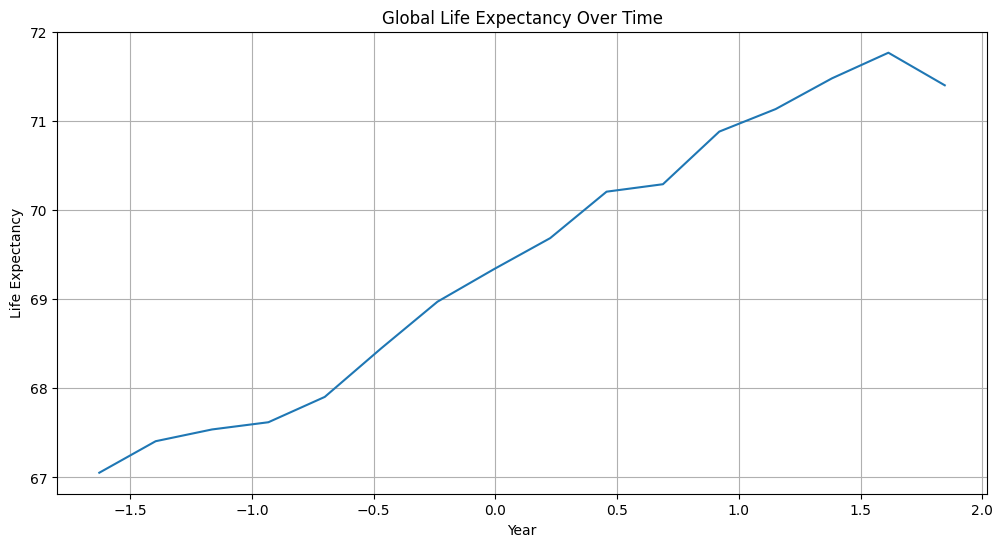

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot: Life Expectancy Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy', errorbar=None)
plt.title("Global Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()



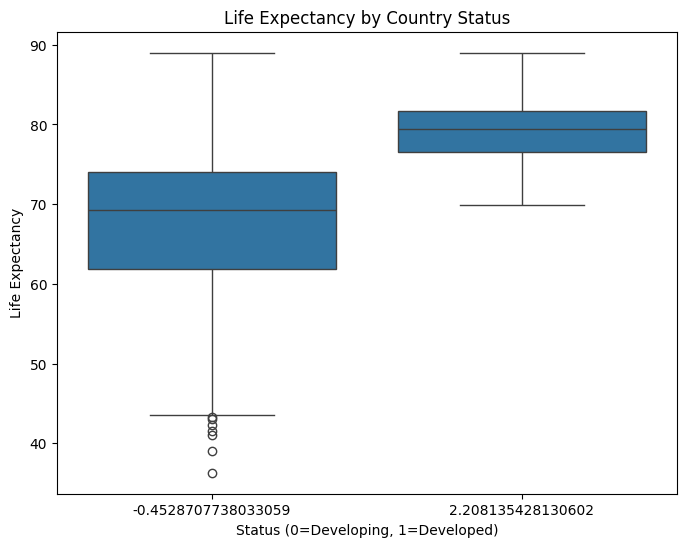

In [87]:
# Box Plot: Life Expectancy by Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Status', y='Life expectancy')
plt.title("Life Expectancy by Country Status")
plt.xlabel("Status (0=Developing, 1=Developed)")
plt.ylabel("Life Expectancy")
plt.show()


#### ⚕️ Health Factors

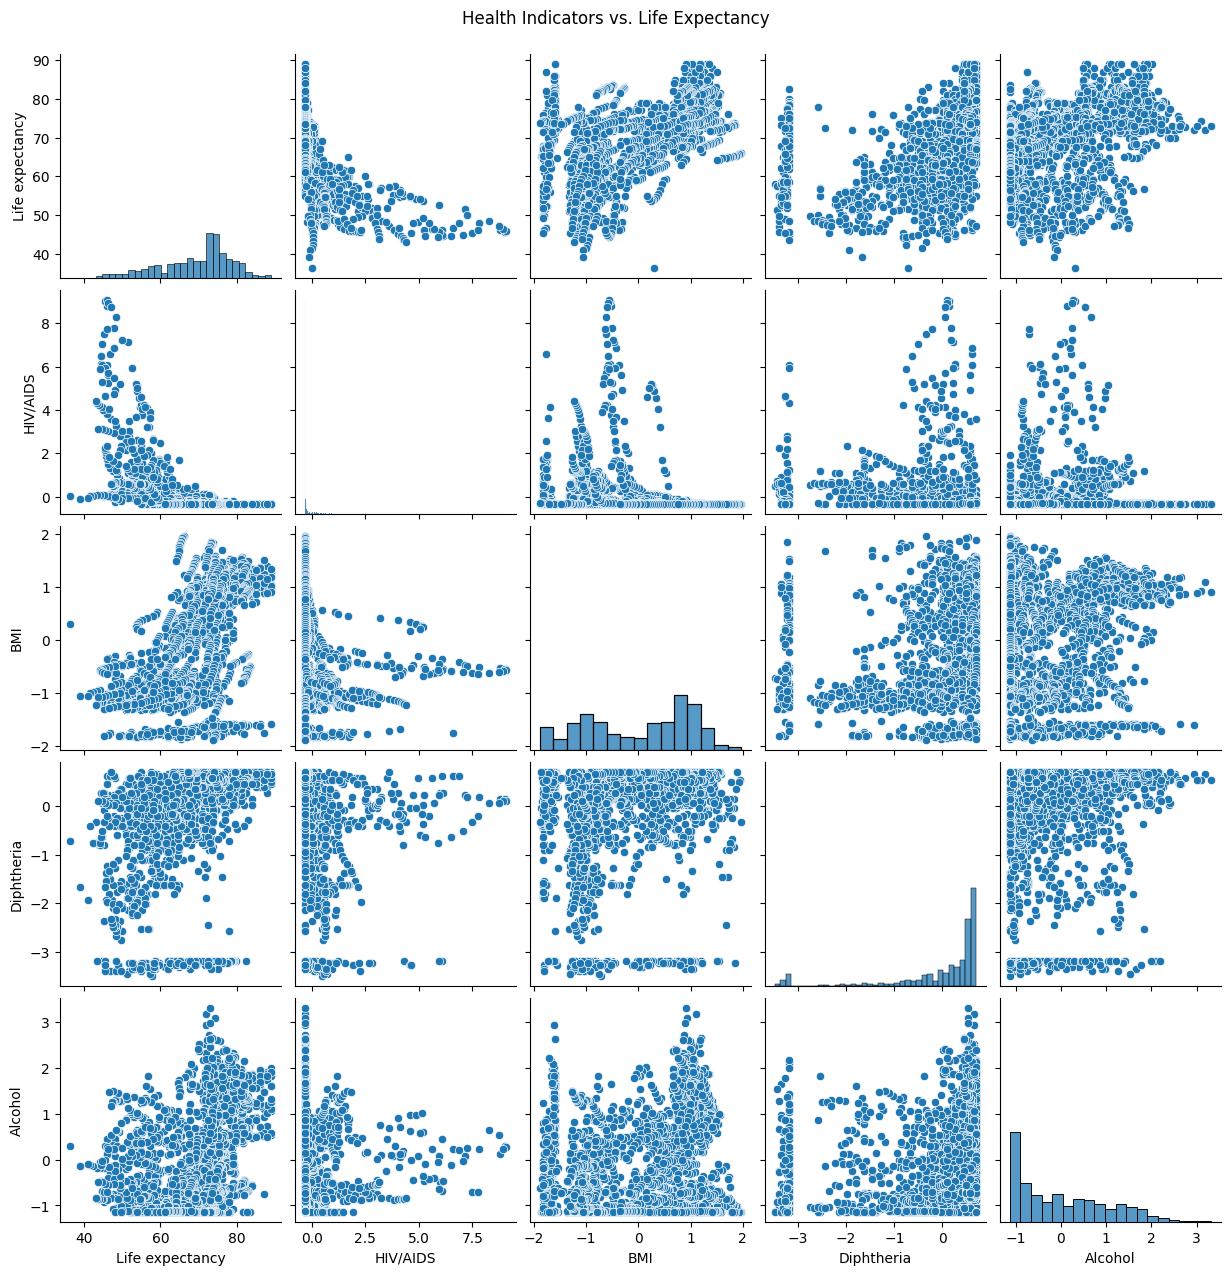

In [88]:
#  Correlation with health metrics
health_cols = ['Life expectancy', 'HIV/AIDS', 'BMI', 'Diphtheria', 'Alcohol']
sns.pairplot(df[health_cols])
plt.suptitle("Health Indicators vs. Life Expectancy", y=1.02)
plt.show()


💰 Economic Indicators

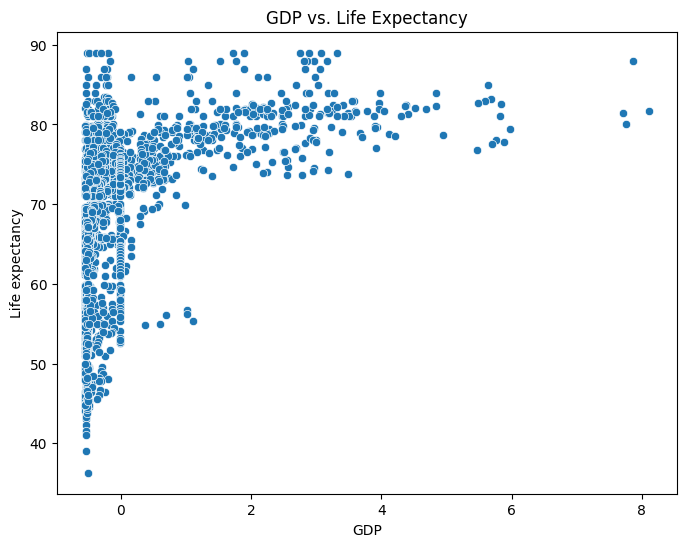

In [89]:
# Scatter Plot: GDP vs. Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy')
plt.title("GDP vs. Life Expectancy")
plt.show()


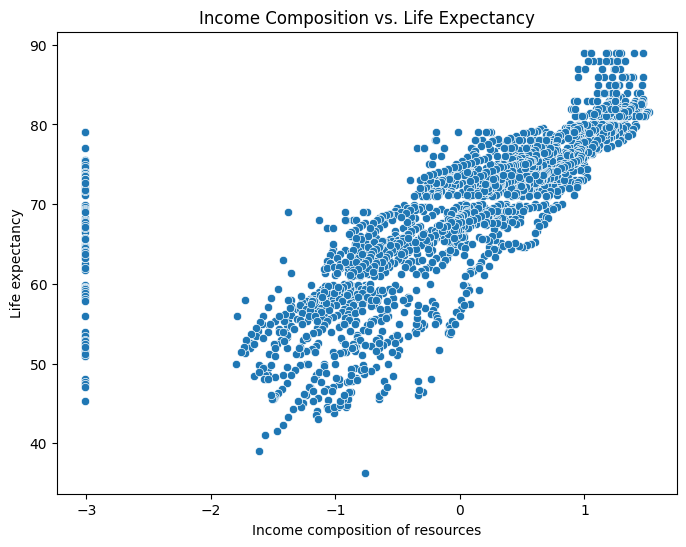

In [90]:
# Scatter Plot: Income Composition of Resources
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income composition of resources', y='Life expectancy')
plt.title("Income Composition vs. Life Expectancy")
plt.show()


#### 🧠 Education Impact

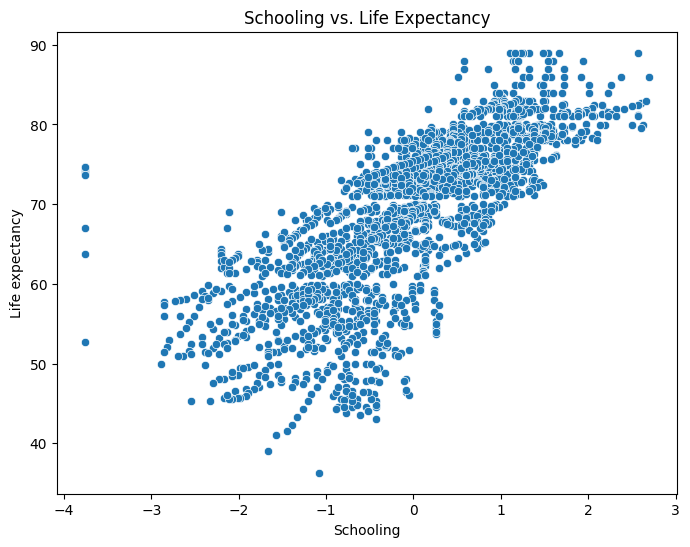

In [91]:
# Scatter Plot: Schooling vs. Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Schooling', y='Life expectancy')
plt.title("Schooling vs. Life Expectancy")
plt.show()


#### 📉 Mortality

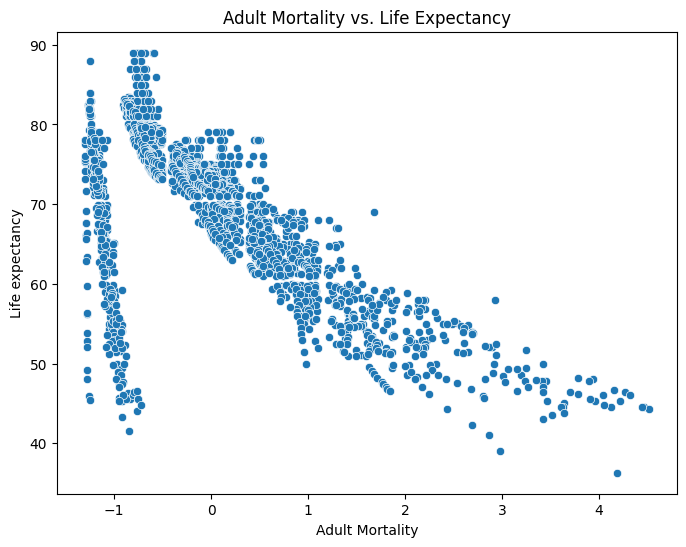

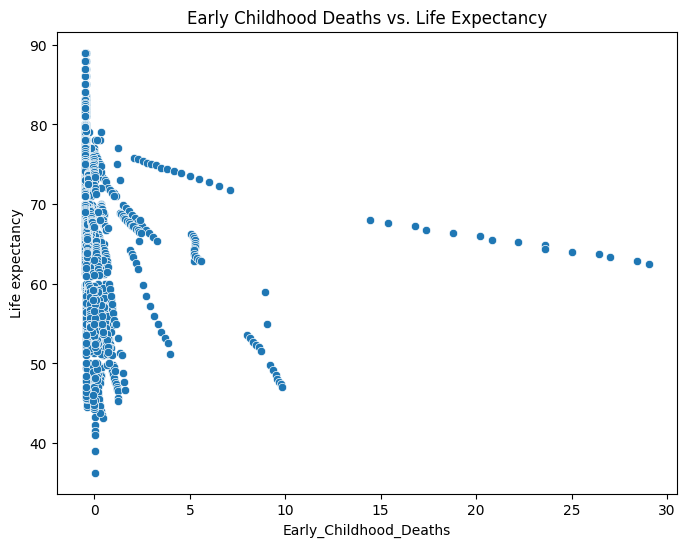

In [92]:
# Scatter Plot: Adult Mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Adult Mortality', y='Life expectancy')
plt.title("Adult Mortality vs. Life Expectancy")
plt.show()

# Scatter Plot: Early Childhood Deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Early_Childhood_Deaths', y='Life expectancy')
plt.title("Early Childhood Deaths vs. Life Expectancy")
plt.show()


# 🧪 Correlation Heatmap



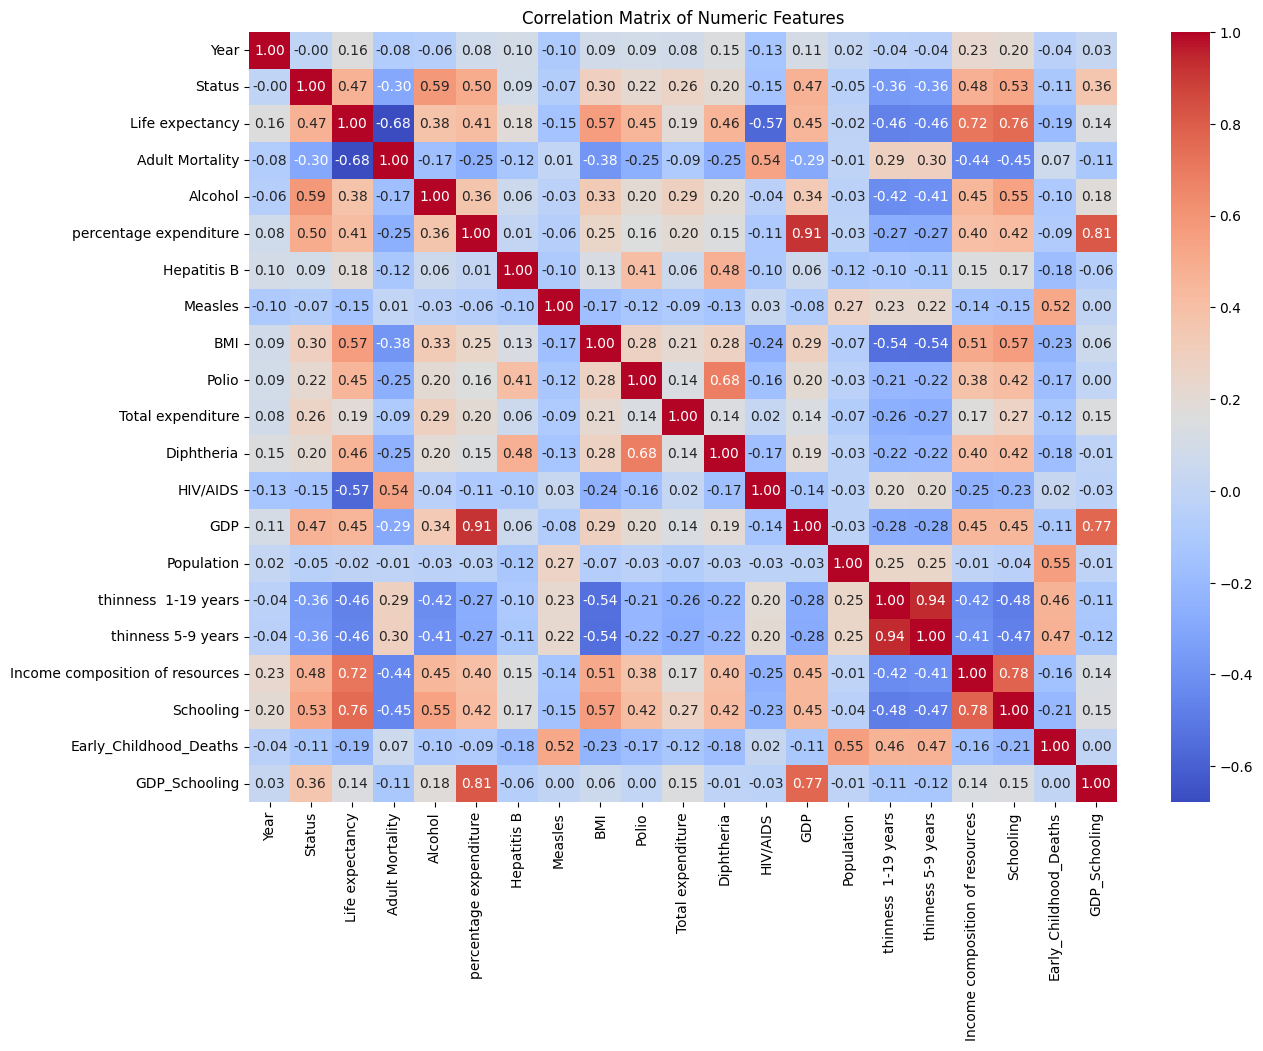

In [93]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()



####🧾 Summary of Key EDA Insights

| Aspect                              | Possible Insight                                 |
| ----------------------------------- | ------------------------------------------------ |
| 🟢 Developed countries              | Higher life expectancy                           |
| 💉 Higher HIV/AIDS rates            | Strong negative correlation with life expectancy |
| 🧠 More schooling                   | Strong positive correlation                      |
| 💰 Higher GDP & income resources    | Positive impact                                  |
| ☠️ Higher mortality (infant, adult) | Strong negative impact                           |


### 📈 5. Feature Selection

#### 🔍 1️⃣ Correlation with Target Variable
Check how strongly each feature relates to Life expectancy.

In [94]:
# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Now compute correlation with target
correlation = numeric_df.corr()['Life expectancy'].sort_values(ascending=False)
print(correlation)


Life expectancy                    1.000000
Schooling                          0.757445
Income composition of resources    0.717953
BMI                                0.566911
Status                             0.474220
Diphtheria                         0.462185
GDP                                0.452773
Polio                              0.452269
percentage expenditure             0.414247
Alcohol                            0.381245
Total expenditure                  0.189895
Hepatitis B                        0.181614
Year                               0.163817
GDP_Schooling                      0.144565
Population                        -0.021262
Measles                           -0.146643
Early_Childhood_Deaths            -0.191114
thinness 5-9 years                -0.458098
thinness  1-19 years              -0.463537
HIV/AIDS                          -0.571707
Adult Mortality                   -0.677911
Name: Life expectancy, dtype: float64


✅ Tip:

- Strong positive correlation (> 0.5): Good predictor

- Strong negative correlation (< -0.5): Also important

- Near 0: Likely not useful

#### 💡 2️⃣ Feature Importance (Tree-Based Models)

Use RandomForestRegressor to get feature importances.

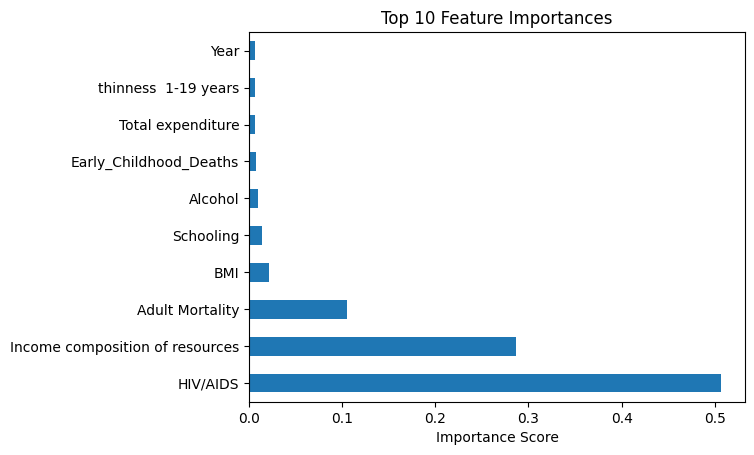

In [95]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df.drop(['Country', 'Life expectancy'], axis=1)
y = df['Life expectancy']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


#### 🔁 3️⃣ Recursive Feature Elimination (RFE)
Use RFE to automatically select the best features.

In [96]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X, y)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Top 10 selected features by RFE:")
print(selected_features)


Top 10 selected features by RFE:
Index(['Adult Mortality', 'percentage expenditure', 'BMI', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Income composition of resources',
       'Schooling', 'GDP_Schooling'],
      dtype='object')


### 🤖 6. Model Building: Modeling for Life Expectancy Prediction

In [97]:
# Prepare Data

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['Country', 'Life expectancy'], axis=1)
y = df['Life expectancy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd



# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(objective='reg:squarederror', random_state=42)


#  Evaluate and Compare

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results.append({
        "Model": name,
        "R² Score": round(r2, 3),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

# Create a DataFrame to compare results
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
results_df


,Model,R² Score,MAE,RMSE
1,Random Forest,0.960,1.17,1.84
4,XGBoost,0.955,1.23,1.96
2,Gradient Boosting,0.938,1.64,2.29
3,SVR,0.862,2.36,3.41
0,Linear Regression,0.810,3.04,4.01






## 🔹 **6. Key Insights & Learnings**

### 🎯 **Top 5 Features Influencing Life Expectancy**

Based on correlation, feature importance (from Random Forest), and RFE:

| Rank | Feature                             | Relationship         |
| ---- | ----------------------------------- | -------------------- |
| 1️⃣  | **Schooling**                       | 📈 Strong positive   |
| 2️⃣  | **Income composition of resources** | 📈 Strong positive   |
| 3️⃣  | **HIV/AIDS**                        | 📉 Strong negative   |
| 4️⃣  | **Adult Mortality**                 | 📉 Strong negative   |
| 5️⃣  | **BMI**                             | 📈 Moderate positive |

> **Insight**: Education and income access are crucial for higher life expectancy, while diseases and mortality drastically lower it.

---

### 🌍 **Developed vs Developing Countries**

| Aspect                  | Developed       | Developing    |
| ----------------------- | --------------- | ------------- |
| Average Life Expectancy | Higher (75–85)  | Lower (55–70) |
| Infant Mortality        | Low             | High          |
| Schooling & Income      | High            | Lower         |
| Health Funding          | More structured | Often limited |

> Developed countries consistently perform better due to stronger health systems, education, and infrastructure.

---

### 📉 **Countries with Drastic Drops or Gains**

You can identify such countries using grouped trend analysis:

```python
df.groupby("Country")["Life expectancy "].agg(["min", "max", "mean"]).sort_values("max", ascending=False).head(10)
```

Examples:

* **Drastic Gains**: Rwanda, Ethiopia — due to health campaigns, vaccine coverage, and reduced HIV/AIDS rates.
* **Drastic Drops**: Some conflict-affected countries (e.g., Syria) due to war and instability.

---

## 🔹 **7. Conclusion**

### 📌 **Summary of Findings**

* Life expectancy is **multifactorial** — strongly influenced by education, income, healthcare access, and disease prevalence.
* Models like **Random Forest** and **XGBoost** performed better due to their ability to capture nonlinearities.
* Key predictors: **Schooling**, **HIV/AIDS rate**, **Income composition**, **Adult mortality**, and **BMI**.

### 🧭 **Real-World Implications**

* Investment in **education** and **income equity** yields substantial health benefits.
* Policies reducing **HIV/AIDS** and improving **maternal/child care** significantly improve life expectancy.
* Countries should strengthen **primary healthcare** and **nutrition programs**.

---

## 🔹 **8. Closing Thoughts**

### ⚠️ **Limitations**

* Some data was missing (e.g., GDP, population) and imputed.
* Data ends in **2015** — may not reflect post-pandemic realities.
* Does not include regional breakdowns or cultural factors.

### 🔮 **Future Scope**

* 🔁 **Time Series Forecasting**: Predict life expectancy beyond 2015 by country.
* 📊 **Clustering Countries**: Group similar countries using KMeans based on health indicators.
* 🌎 **Geo-visualization**: Use choropleth maps for country-wise visual storytelling.
* 🧪 **Causal Inference**: Go beyond correlation using techniques like propensity scoring or instrumental variables.


